<a href="https://colab.research.google.com/github/kempess/multimedia-system-practice/blob/master/modul_5_audio_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalasi Package

In [ ]:
!pip install librosa
!pip install soundfile
!pip install pydub
!pip install gtts
!apt install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


# Dependensi

In [ ]:
import librosa
import soundfile as sf
from gtts import gTTS
from IPython.display import Audio
from IPython.display import display
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

# Motivasi

motivation of audio processing
  - Communication
    - Denoising: dapet audio isinya kekeresekan
    - Amplification: dapet audio tapi suaranya kecil ga jelas
    - Text to Speech
    - Speech to Text
      - Audio representation
      - Audio compression
      - Audio annotation
  - Entertainment
    - Effects: memberi efek kepada audio original
    - Conversion: mengkonversi format ke dalam format lain
    - Mixing: remix lagu
      - Equalization
      - Filtering
      - Pitch manipulation
    - Pattern recognition
      - Feature extraction
      - Recommendation
      - Mood
  - Software engineering
    - Audio transmission
      - Audio representation
      - Audio compression

- Weeks
  1. Audio manipulation
    - Tools
    - Load audio file
    - Visualization ~ noise
    - Feature extraction ~ denoising
    - Combination
  2. Audio compression & transmission
  3. Audio processing tools 

- Load audio file
  - Sources
    - Record their own sound, ex: mobile recording
    - Use existing sound, ex: Smule karaoke
  - Upload to Colab
  - Load as object
- Visualize audio file
  - Waveform
  - Spectogram
- Noise reduction
- Feature extraction
  - MFCC
  - Centroid of wave
  - Spectral rollof
  - Spectral bandwidth
- Combination

- Challenge : Noise reduction

# Text to Speech - Membuat Audio Suara dari Teks

In [ ]:
file_suara_hasil_tts = 'suara-hasil-tts.wav'
teks_suara = "Ini ada tempat makan surabi yang bikin perut bergembira, bawa sepuluh ribu kenyangnya sampe subuh"

# Mengkonversi teks menjadi suara menggunakan Google Text-to-Speech
# Parameter lang: kode bahasa
tts = gTTS(teks_suara, lang='ko')

# Menyimpan file suara
tts.save(file_suara_hasil_tts) # Save hasil suara menggunakan TTS

y, sr = librosa.load(file_suara_hasil_tts)
sf.write(file_suara_hasil_tts, y, sr) # Hasil save dari TTS, dibuka dan ditulis ulang oleh librosa

# Menjalankan dan menampilkan audio player
play_suara = Audio(file_suara_hasil_tts, autoplay=True)
display(play_suara)

# Mengubah Pitch Audio

In [ ]:
file_suara_ubah_pitch_wav = 'suara-ubah-pitch.wav'

# y : Variabel berisi representasi audio dalam bentuk Waveform format Numpy Array
# sr : Variabel berisi sampling rate, jumlah sample per detik, satuannya Hertz
# Kamu bisa perbesar sampling rate agar suaranya jadi lebih cepat
# Atau kurangi sampling rate agar suaranya jadi lebih lambat
y, sr = librosa.load(file_suara_hasil_tts)

print("sampling_rate", sr)

# Membuat sampling rate yang lebih cepat 1.5 kali dari sampling rate awal
sr_lebih_cepat = int(sr*1.5)

# Mengubah pitch dari Waveform dan audio, agar seperti suara tipikal sosmed
y_shifted = librosa.effects.pitch_shift(y, sr=sr_lebih_cepat, n_steps=0)

# Menyimpan file suara
sf.write(file_suara_ubah_pitch_wav, y_shifted, sr_lebih_cepat)

# Menjalankan dan menampilkan audio player
play_suara = Audio(file_suara_ubah_pitch_wav, autoplay=False)
display(play_suara)

sampling_rate 22050


In [ ]:
# Cek besar file hasil pengubahan pitch
!ls -l --block-size=K

total 776K
drwxr-xr-x 1 root root   4K Apr  4 13:35 sample_data
-rw-r--r-- 1 root root  34K Apr  6 04:07 suara-hasil-tts.mp3
-rw-r--r-- 1 root root 366K Apr  6 04:02 suara-hasil-tts.wav
-rw-r--r-- 1 root root 366K Apr  6 04:08 suara-ubah-pitch.wav


# Mengkonversi Audio dari Wav ke Format Lainnya [📖](https://github.com/jiaaro/pydub/blob/master/API.markdown)

In [ ]:
# Class AudioSegment dari pydub memiliki kemampuan untuk konversi format file audio

file_suara_hasil_tts_mp3 = 'suara-hasil-tts.mp3'
AudioSegment.from_file(file_suara_hasil_tts, "wav").export('suara-hasil-tts.mp3', format="mp3")

file_suara_ubah_pitch_mp3 = 'suara-ubah-pitch.mp3'
AudioSegment.from_file(file_suara_ubah_pitch_wav, "wav").export(file_suara_ubah_pitch_mp3, format="mp3")

file_suara_ubah_pitch_ogg = 'suara-ubah-pitch.ogg'
AudioSegment.from_file(file_suara_ubah_pitch_wav, "wav").export(file_suara_ubah_pitch_ogg, format="ogg")

# Menjalankan dan menampilkan audio player
play_suara = Audio(file_suara_ubah_pitch_mp3, autoplay=True)
display(play_suara)

In [ ]:
# Cek besar file hasil pengubahan pitch
!ls -l --block-size=K

total 856K
drwxr-xr-x 1 root root   4K Apr  4 13:35 sample_data
-rw-r--r-- 1 root root  34K Apr  6 04:08 suara-hasil-tts.mp3
-rw-r--r-- 1 root root 366K Apr  6 04:02 suara-hasil-tts.wav
-rw-r--r-- 1 root root  34K Apr  6 04:08 suara-ubah-pitch.mp3
-rw-r--r-- 1 root root  43K Apr  6 04:08 suara-ubah-pitch.ogg
-rw-r--r-- 1 root root 366K Apr  6 04:08 suara-ubah-pitch.wav


# Visualisasi Frequency Spectogram

In [ ]:
def tampilkan_frequency_power_spectogram(y, sr, title):  
  fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
  img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
  ax[0].set(title="Linear-frequency power spect.: {}".format(title))
  ax[0].label_outer()
  hop_length = 1024

  D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
  librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])
  ax[1].set(title="Log-frequency power spect.: {}".format(title))
  ax[1].label_outer()

  fig.colorbar(img, ax=ax, format="%+2.f dB")

def tampilkan_waveplot(y, sr, title):
  plt.figure(figsize=(10, 3))
  plt.title("Waveplot: {}".format(title))
  librosa.display.waveshow(y, sr=sr)

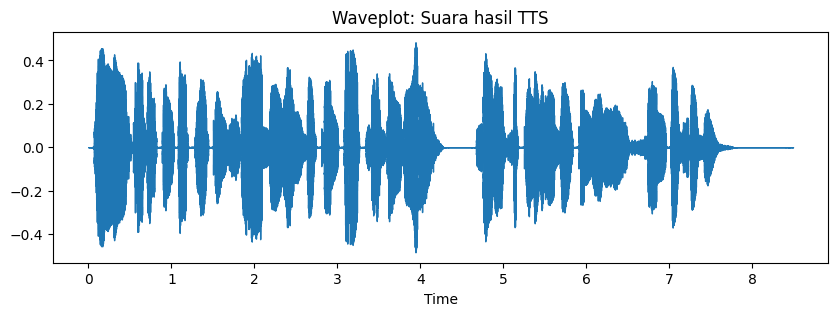

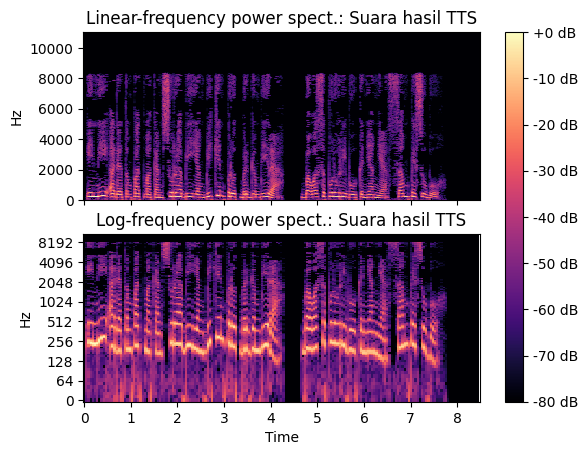

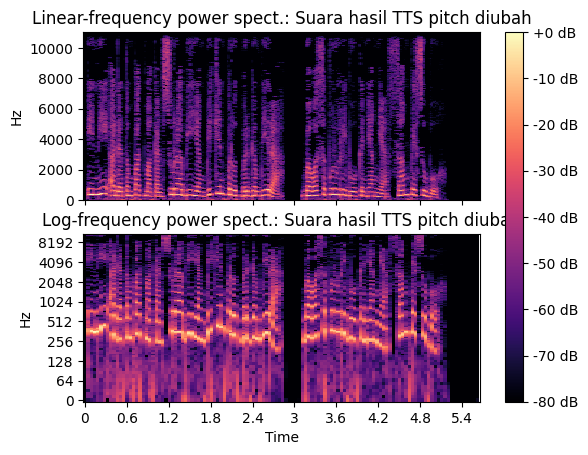

In [ ]:
y, sr = librosa.load(file_suara_hasil_tts)
tampilkan_waveplot(y, sr, "Suara hasil TTS")
tampilkan_frequency_power_spectogram(y, sr, "Suara hasil TTS")

y, sr = librosa.load(file_suara_ubah_pitch_wav)
tampilkan_frequency_power_spectogram(y, sr, "Suara hasil TTS pitch diubah")

# Download Sampel Audio

In [ ]:
!wget -q https://gitlab.com/marchgis/march-ed/2023/courses/if216006-praktikum-sistem-multimedia/-/raw/main/modul-5-audio-representation/i-see-the-light-iccanotes-cover.mp3 -O contoh-cover-lagu.mp3
!wget -q https://gitlab.com/marchgis/march-ed/2023/courses/if216006-praktikum-sistem-multimedia/-/raw/main/modul-5-audio-representation/nada-kantjana-yaumal-kiamat-cover-insanalamin_.mp3 -O contoh-cover-musik.mp3
!ls -l --block-size=K

total 3628K
-rw-r--r-- 1 root root 1921K Apr  6 04:10 contoh-cover-lagu.mp3
-rw-r--r-- 1 root root  848K Apr  6 04:10 contoh-cover-musik.mp3
drwxr-xr-x 1 root root    4K Apr  4 13:35 sample_data
-rw-r--r-- 1 root root   34K Apr  6 04:08 suara-hasil-tts.mp3
-rw-r--r-- 1 root root  366K Apr  6 04:02 suara-hasil-tts.wav
-rw-r--r-- 1 root root   34K Apr  6 04:08 suara-ubah-pitch.mp3
-rw-r--r-- 1 root root   43K Apr  6 04:08 suara-ubah-pitch.ogg
-rw-r--r-- 1 root root  366K Apr  6 04:08 suara-ubah-pitch.wav


Cover lagu: I see the light


Cover musik: Yaumal kiamat


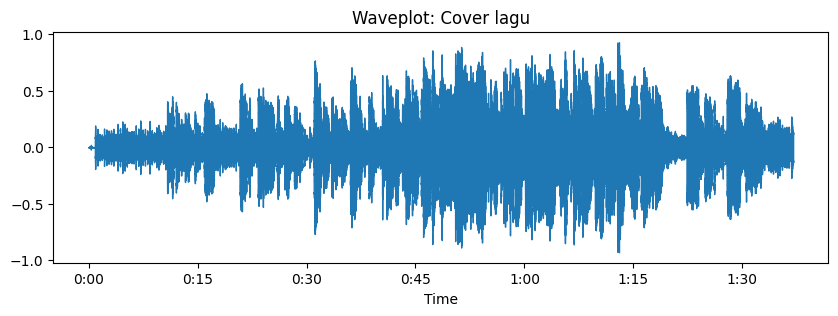

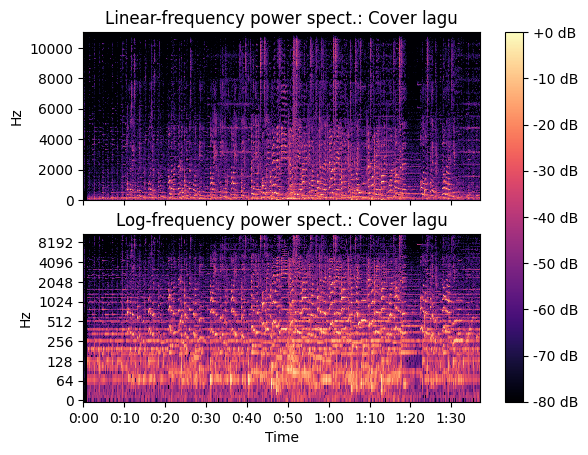

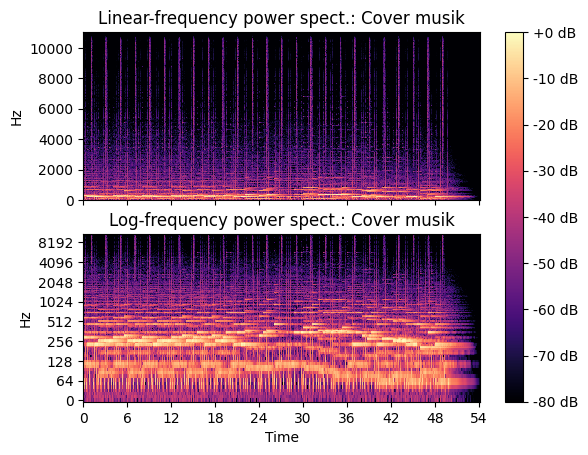

In [ ]:
file_contoh_cover_lagu_mp3 = 'contoh-cover-lagu.mp3'
file_contoh_cover_musik_mp3 = 'contoh-cover-musik.mp3'

# Menjalankan dan menampilkan audio player contoh cover lagu I see the light
print("Cover lagu: I see the light")
play_suara = Audio(file_contoh_cover_lagu_mp3, autoplay=False)
display(play_suara)

y, sr = librosa.load(file_contoh_cover_lagu_mp3)
tampilkan_waveplot(y, sr, "Cover lagu")
tampilkan_frequency_power_spectogram(y, sr, "Cover lagu")

# Menjalankan dan menampilkan audio player contoh cover musik Yaumal kiamat
print("Cover musik: Yaumal kiamat")
play_suara = Audio(file_contoh_cover_musik_mp3, autoplay=False)
display(play_suara)

y, sr = librosa.load(file_contoh_cover_musik_mp3)
tampilkan_frequency_power_spectogram(y, sr, "Cover musik")

# Menggabungkan File Audio

In [ ]:
audio1 = AudioSegment.from_file(file_suara_hasil_tts_mp3, format="mp3")
audio2 = AudioSegment.from_file(file_suara_ubah_pitch_mp3, format="mp3")
audio3_musik_latar = AudioSegment.from_file(file_contoh_cover_musik_mp3, format="mp3")


# Audio 1, 12 desibel lebih rendah
audio1_lebih_keras = audio1 + 12

# Menggabungkan Audio
audio_gabungan = audio1_lebih_keras + audio2

# Menyimpan File
file_audio_gabungan_wav = 'file_audio_gabungan.wav'
audio_gabungan.export(file_audio_gabungan_wav, format="wav")

# Menjalankan dan menampilkan audio player
play_suara = Audio(file_audio_gabungan_wav, autoplay=True)
display(play_suara)


# https://stackoverflow.com/questions/61499350/combine-audio-files-in-python


# Memotong File Audio

In [ ]:
# Jika menggunakan pydub, sampling rate ada di atribut .frame_rate
sr = audio2.frame_rate # per 1 detik
detik_dari = sr * 2 # dari detik ke 0
detik_hingga = sr * 3 # hingga detik ke 3

# Memotong audio menggunakan array
samples_audio2 = audio2.get_array_of_samples()  # Mengambil samples audio
audio2_potong_array = samples_audio2[detik_dari:detik_hingga] # Memilih potongan array yang akan diambil
audio2_potong = audio2._spawn(audio2_potong_array) # Mengkonversi kembali dari array

# Menyimpan hasil potongan audio
file_audio2_potong = 'audio2_potong.wav'
audio2_potong.export(file_audio2_potong)

# Menjalankan dan menampilkan audio player
play_suara = Audio(file_audio2_potong, autoplay=True)
display(play_suara)

# Overlay

In [ ]:
(audio1).overlay(audio3_musik_latar - 12)